In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [3]:
sales_data = pd.read_csv("sales_6.csv")
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [4]:
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


In [5]:
sales_data['date'].value_counts()

date
2022-03    50465
2022-02    49380
Name: count, dtype: int64

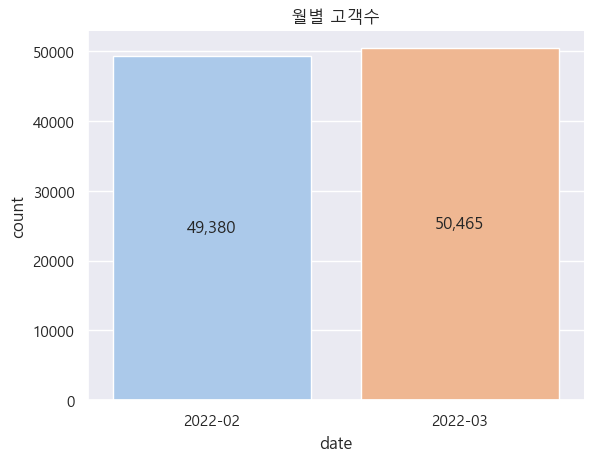

In [8]:
ax = sns.countplot(data=sales_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{i:,.0f}' for i in containers.datavalues], label_type='center')
plt.title("월별 고객수")
plt.show()

In [9]:
grouped = sales_data['Status'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

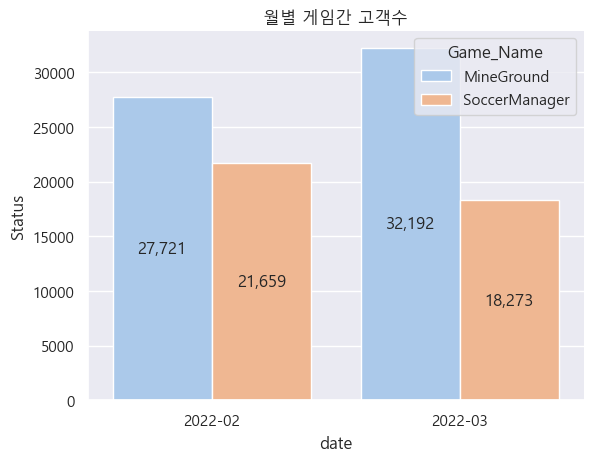

In [10]:
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')
containers = ax.containers[0]
containers0 = ax.containers[1]
ax.bar_label(containers, labels=[f'{i:,.0f}' for i in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{i:,.0f}' for i in containers0.datavalues], label_type='center')
plt.title("월별 게임간 고객수")
plt.show()

In [11]:
sales_data['Status'].value_counts()

Status
play       84821
install    15024
Name: count, dtype: int64

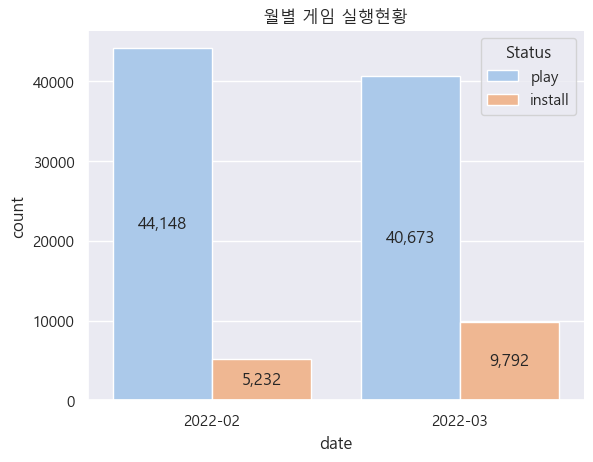

In [15]:
ax = sns.countplot(data = sales_data,x="date", hue="Status")
containers = ax.containers[1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('월별 게임 실행현황')
plt.show()

In [13]:
temp_data = sales_data[sales_data['Payment'] != 0]
temp_data['date'].value_counts()

date
2022-02    8542
2022-03    6898
Name: count, dtype: int64

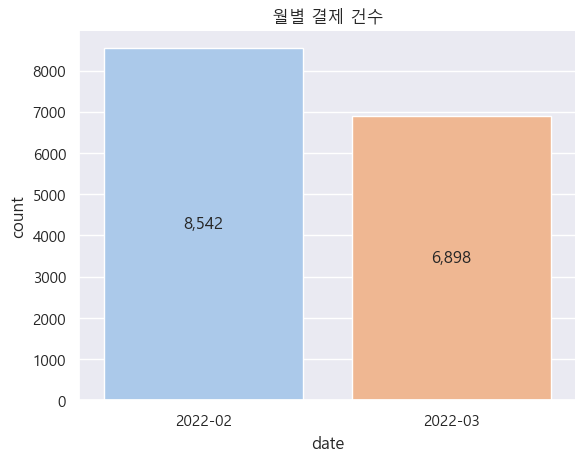

In [16]:
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('월별 결제 건수')
plt.show()

In [17]:
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3762
         SoccerManager    3136
Name: Payment, dtype: int64

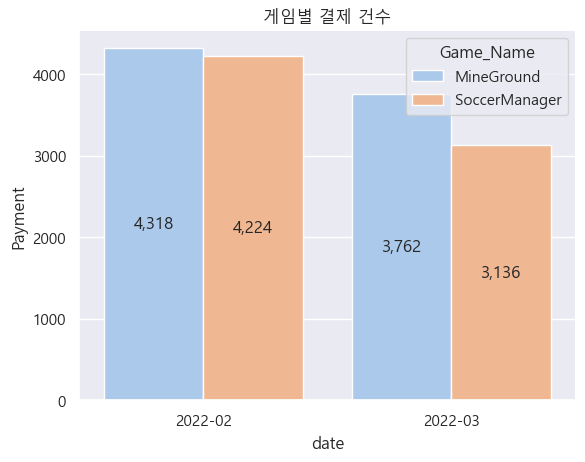

In [21]:
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')
containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('게임별 결제 건수')
plt.show()

In [19]:
temp_data = sales_data["Payment"].groupby([sales_data["Game_Name"],sales_data["date"]]).sum()
temp_data

Game_Name      date   
MineGround     2022-02    42114200
               2022-03    38722800
SoccerManager  2022-02    38727600
               2022-03    29638400
Name: Payment, dtype: int64

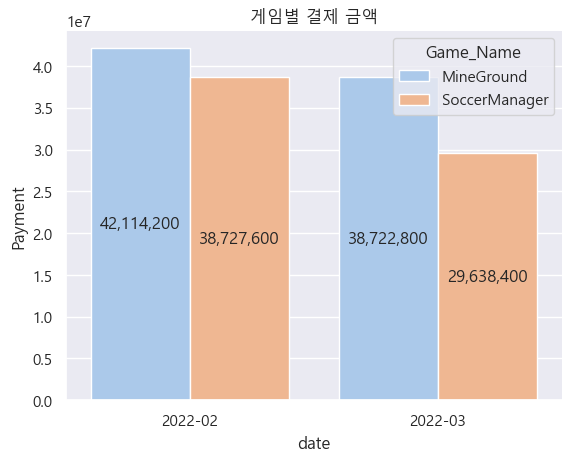

In [22]:
ax = sns.barplot(data=temp_data.reset_index(), x='date',y="Payment", hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('게임별 결제 금액')
plt.show()

In [23]:
player_data = sales_data[sales_data['Status'] == 'play']
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84821 entries, 0 to 84820
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      84821 non-null  object
 1   Time_stamp   84821 non-null  object
 2   Game_Name    84821 non-null  object
 3   Status       84821 non-null  object
 4   Payment      84821 non-null  int64 
 5   Customer_ID  84821 non-null  object
 6   date         84821 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.2+ MB


In [24]:
player_data['install_date'] = player_data['install'].str[:7]
player_data['play_date'] = player_data['Time_stamp'].str[:7]
player_data

C:\Users\김영준\AppData\Local\Temp\ipykernel_8160\912168920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['install_date'] = player_data['install'].str[:7]
C:\Users\김영준\AppData\Local\Temp\ipykernel_8160\912168920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['play_date'] = player_data['Time_stamp'].str[:7]


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02
...,...,...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03,2022-03,2022-03


In [25]:
# install_date와 play_date열의 값이 같으면, New Player 값이 다르면 Existing
player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')
player_data

C:\Users\김영준\AppData\Local\Temp\ipykernel_8160\2538675099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['type'] = np.where(player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date,type
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02,Existing
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02,Existing
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02,Existing
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02,Existing
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02,Existing
...,...,...,...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03,New Player
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03,New Player
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03,New Player
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03,2022-03,2022-03,New Player


In [26]:
grouped = player_data['Status'].groupby([player_data['play_date'], player_data['type']]).count()
grouped

play_date  type      
2022-02    Existing      28668
           New Player    15480
2022-03    Existing      28207
           New Player    12466
Name: Status, dtype: int64

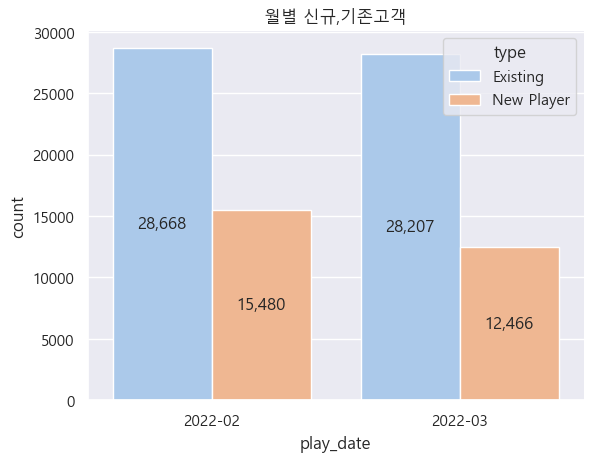

In [28]:
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('월별 신규,기존고객')
plt.show()

In [29]:
temp_data = player_data['Payment'].groupby( [player_data['play_date'],player_data['type']]).sum()
temp_data

play_date  type      
2022-02    Existing      50140500
           New Player    30701300
2022-03    Existing      50140500
           New Player    18220700
Name: Payment, dtype: int64

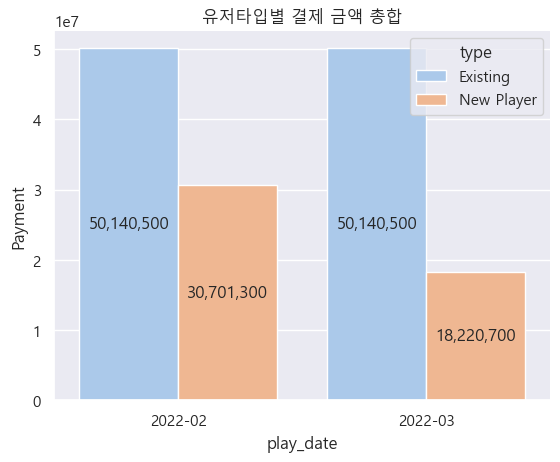

In [31]:
ax = sns.barplot(data=temp_data.reset_index(), x='play_date', y='Payment', hue='type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('유저타입별 결제 금액 총합')
plt.show()

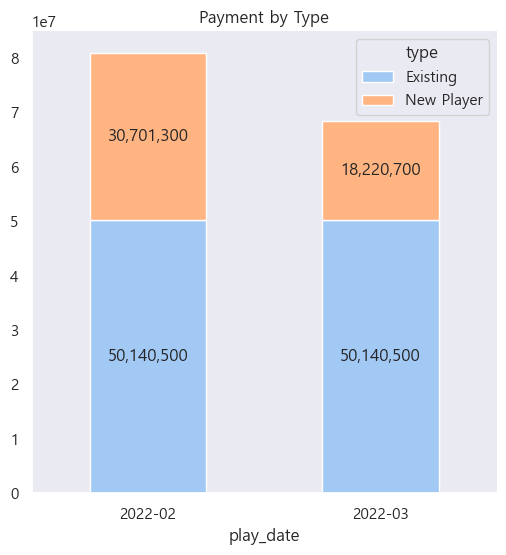

In [33]:
# 누적막대 그래프
ax = temp_data.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])

containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[0]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.xticks(rotation=0)
plt.title('Payment by Type')
plt.show()

In [38]:
payment_data = player_data.set_index('type', drop=True)
payment_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
type,,,,,,,,,
Existing,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02
Existing,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02
Existing,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02
Existing,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02
Existing,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02
...,...,...,...,...,...,...,...,...,...
New Player,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
New Player,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
New Player,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03


In [39]:
payment_data.drop('Existing', inplace=True)
payment_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
type,,,,,,,,,
New Player,2022-02-06,2022-02-11,MineGround,play,9900,dolorum016,2022-02,2022-02,2022-02
New Player,2022-02-16,2022-02-17,MineGround,play,49900,qui798,2022-02,2022-02,2022-02
New Player,2022-02-07,2022-02-08,MineGround,play,900,nesciunt993,2022-02,2022-02,2022-02
New Player,2022-02-03,2022-02-08,MineGround,play,900,ratione752,2022-02,2022-02,2022-02
New Player,2022-02-03,2022-02-06,MineGround,play,900,ullam478,2022-02,2022-02,2022-02
...,...,...,...,...,...,...,...,...,...
New Player,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
New Player,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
New Player,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03


In [40]:
payment_data = payment_data.set_index('Payment')
payment_data

,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date,play_date
Payment,,,,,,,,
9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02,2022-02
49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02,2022-02
900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02,2022-02
900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02,2022-02
900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02,2022-02
...,...,...,...,...,...,...,...,...
0,2022-03-06,2022-03-11,SoccerManager,play,sed821,2022-03,2022-03,2022-03
0,2022-03-20,2022-03-23,SoccerManager,play,minima581,2022-03,2022-03,2022-03
0,2022-03-25,2022-03-27,SoccerManager,play,harum162,2022-03,2022-03,2022-03


In [41]:
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()
payment_data

,Payment,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date,play_date
0,9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02,2022-02
1,49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02,2022-02
2,900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02,2022-02
3,900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02,2022-02
4,900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02,2022-02
...,...,...,...,...,...,...,...,...,...
5035,9900,2022-03-21,2022-03-25,SoccerManager,play,a329,2022-03,2022-03,2022-03
5036,9900,2022-03-18,2022-03-20,SoccerManager,play,dignissimos737,2022-03,2022-03,2022-03
5037,900,2022-03-17,2022-03-20,SoccerManager,play,sequi289,2022-03,2022-03,2022-03
5038,4900,2022-03-13,2022-03-16,SoccerManager,play,delectus499,2022-03,2022-03,2022-03


In [42]:
payment_data_02 = payment_data[payment_data['play_date'] == '2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values
total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)
total_payment

array([array([ 9900, 49900,   900, ...,   900,  9900,  4900], dtype=int64),
       array([  900,  4900, 29900, ...,   900,  4900,  4900], dtype=int64)],
      dtype=object)

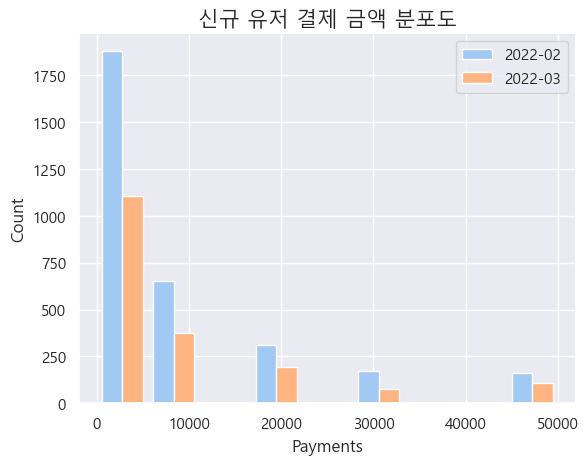

In [44]:
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("신규 유저 결제 금액 분포도", fontsize=15)
plt.legend()
plt.show()

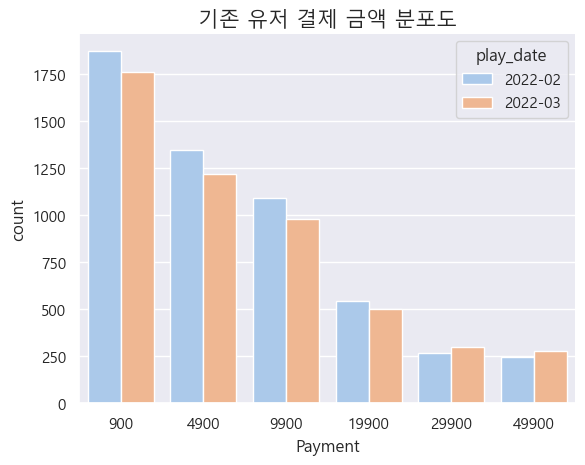

[900, 4900, 9900, 19900, 29900, 49900]

In [51]:
payment_data2 = player_data[(player_data['type'] == 'Existing') & (player_data['Payment'] != 0)]

sns.countplot(data=payment_data2, x="Payment", hue="play_date")
plt.title("기존 유저 결제 금액 분포도", fontsize=15)
plt.show()

sorted(payment_data2["Payment"].unique())